In [144]:
import pandas as pd
import seaborn as sns
import mplcyberpunk
import matplotlib.pyplot as plt
from sklearn.svm import SVC
plt.style.use('cyberpunk')

In [145]:
ppl_data_train=pd.read_csv(r'C:\Users\Ashinth\Documents\courses\Kaggle\competetions\train.csv')
ppl_data_test=pd.read_csv(r'C:\Users\Ashinth\Documents\courses\Kaggle\competetions\test.csv')

In [146]:
ppl_data_train.head()
#ppl_data_train.shape

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
ppl_data_train.isna().sum() #number of null values in the columns

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

### Plotting and checking for relationships ###


  HomePlanet  counts
0      Earth    4602
1     Europa    2131
2       Mars    1759


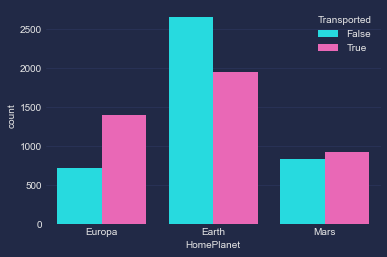

In [5]:
# 1.between home planet and transported

homeplanet_transport= pd.DataFrame(ppl_data_train['HomePlanet'].value_counts().reset_index().rename(columns={'index':'HomePlanet','HomePlanet':'counts'}))

print(homeplanet_transport)

sns.countplot(x='HomePlanet',data=ppl_data_train,hue='Transported')
plt.show()


<AxesSubplot:xlabel='Age', ylabel='Count'>

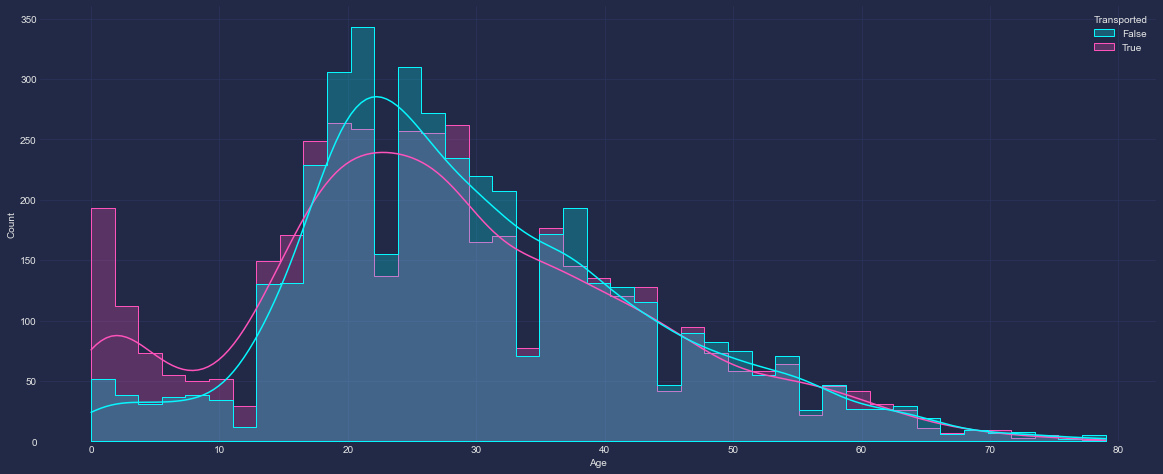

In [6]:
# 2. Between age and transported
plt.figure(figsize=(20,8))
sns.histplot(x='Age',data=ppl_data_train,kde=True,hue='Transported',element='step')

<AxesSubplot:xlabel='Cabin', ylabel='count'>

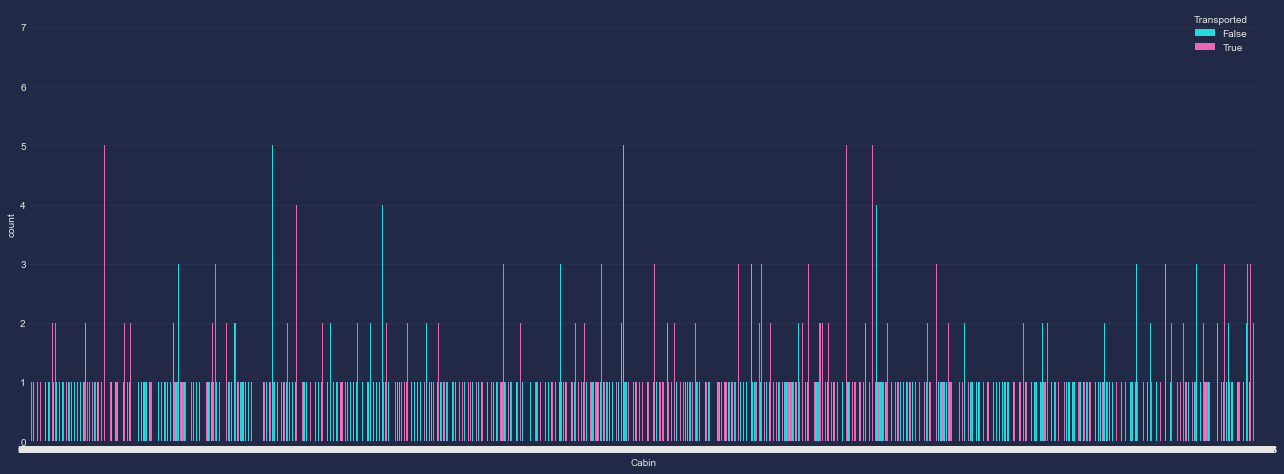

In [10]:
# 3. Between cabin number and transported
ppl_data_train.Cabin.value_counts()
plt.figure(figsize=(22,8))
sns.countplot(x='Cabin',data=ppl_data_train,hue='Transported')

c:\Users\Ashinth\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='Spent', ylabel='count'>

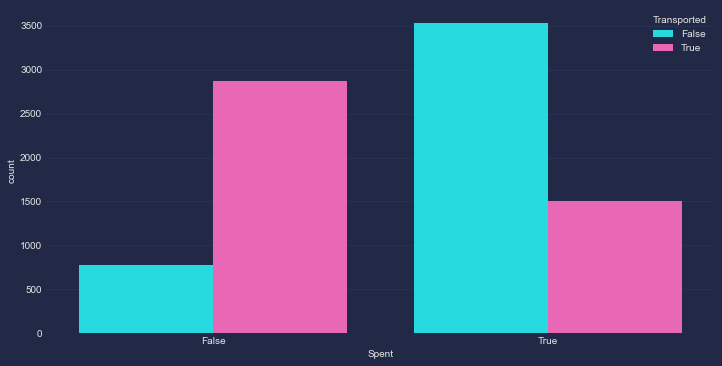

In [98]:
# 4.checking if they have spent money or not, and then transported
column=['RoomService','FoodCourt','Spa','ShoppingMall','VRDeck']
s=list(ppl_data_train[column].sum(axis=1))
ppl_data_train['Spending']=s
ppl_data_train['Spending']=ppl_data_train['Spending'].astype('int64')

x=lambda val: True if val>0 else False

for i in range(len(ppl_data_train)):
    val=ppl_data_train['Spending'].iloc[i]
    ppl_data_train['Spent'].iloc[i]=x(val)

ppl_data_train.drop(['spending'],axis=1)


plt.figure(figsize=(12,6))
sns.countplot(x='Spent',data=ppl_data_train, hue='Transported')




<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

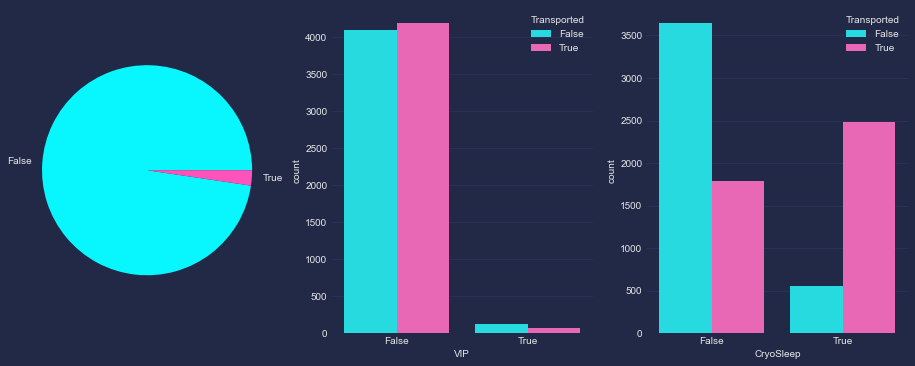

In [97]:
# 5. between VIP, cryosleep and transported
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
plt.pie(list(ppl_data_train['VIP'].value_counts()),labels=['False','True'])

plt.subplot(1,3,2)
sns.countplot(x='VIP',data=ppl_data_train,hue='Transported')

plt.subplot(1,3,3)
sns.countplot(x='CryoSleep',data=ppl_data_train,hue='Transported')

<AxesSubplot:xlabel='Destination', ylabel='count'>

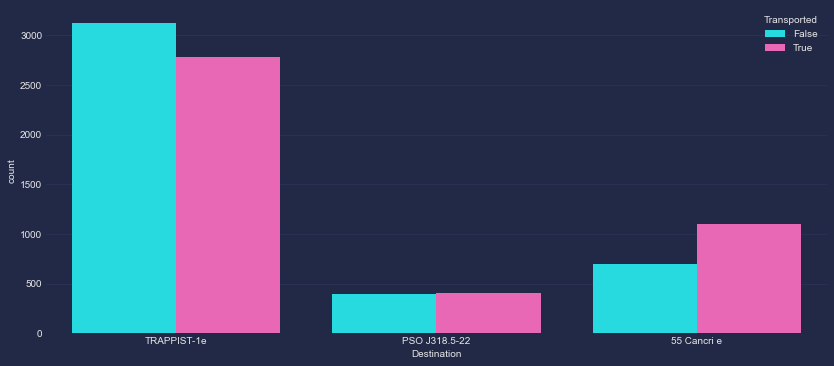

In [100]:
plt.figure(figsize=(14,6))
sns.countplot(x='Destination',data=ppl_data_train,hue='Transported')

__since none of the plots above is showing any sort of bias, now we have to combine more than one   feature to check for any biases__

### Combining Features ###

In [101]:
ppl_data_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,spending,Spending,Spent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,736,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,10383,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,5176,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,1091,True


In [137]:
# Relating Homeplanet to the destinations
x=pd.DataFrame(ppl_data_train.groupby(['HomePlanet','Destination']).Transported.value_counts())
x.rename(columns={'Transported':'Value'})

Value
HomePlanet Destination   Transported       
Earth      55 Cancri e   True           348
                         False          342
           PSO J318.5-22 False          357
                         True           355
           TRAPPIST-1e   False         1894
                         True          1207
Europa     55 Cancri e   True           611
                         False          275
           PSO J318.5-22 True            14
                         False            5
           TRAPPIST-1e   True           755
                         False          434
Mars       55 Cancri e   True           118
                         False           75
           PSO J318.5-22 False           27
                         True            22
           TRAPPIST-1e   True           755
                         False          720

In [151]:
for i in (range(len(ppl_data_train.Transported))):
    if(ppl_data_train.Transported.iloc[i]==True):
        ppl_data_train['Transport'].iloc[i]=1
    elif(ppl_data_train.Transported.iloc[i]==False):
        ppl_data_train['Transport'].iloc[i]=0

for i in (range(len(ppl_data_test.Transported))):
    if(ppl_data_test.Transported.iloc[i]==True):
        ppl_data_test['Transport'].iloc[i]=1
    elif(ppl_data_test.Transported.iloc[i]==False):
        ppl_data_test['Transport'].iloc[i]=0

ppl_data_train['Transport']

c:\Users\Ashinth\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


AttributeError: 'DataFrame' object has no attribute 'Transported'

In [156]:
parameters=['Age']
X_train=ppl_data_train(ppl_data_train[parameters].dtypes=='float64')
#X_val=ppl_data_test[parameters]

y_train=ppl_data_train['Transport']
#y_val= ppl_data_test['Transport']

model=SVC(random_state=1)
model.fit(X_train,y_train)

TypeError: 'DataFrame' object is not callable